# Lang distances comparison

In [8]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")

from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [9]:
common_config.figure_journal_basic()

In [10]:
sys.path.append('/Users/mamba/Documents') #TODO: replace with direct import
import Code.pertpy.pertpy as pt

In [11]:
#import pertpy as pt
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
adata = sc.read_h5ad("230114_hPCLS_perturbation.h5ad")
adata

AnnData object with n_obs × n_vars = 63581 × 17343
    obs: 'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

In [13]:
metric = "mse"

In [14]:
distances = {"groups": [], "distance": []}

distance = pt.tl.Distance(metric, obsm_key="X_pca")
df = distance.pairwise(adata, groupby="treatment", show_progressbar=False)

for group in ("CC vs. FC", "CC vs. FC+CMP4", "CC vs. FC+Nintedanib", 
               "FC vs. FC+CMP4", "FC vs. FC+Nintedanib", "FC+CMP4 vs. FC+Nintedanib"):
    #distances["metric"].append(metric)
    distances["groups"].append(group)
    distances["distance"].append(df.loc[group.split(" vs. ")[0]][group.split(" vs. ")[1]])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'CC vs. FC'),
  Text(1, 0, 'CC vs. FC+CMP4'),
  Text(2, 0, 'CC vs. FC+Nintedanib'),
  Text(3, 0, 'FC vs. FC+CMP4'),
  Text(4, 0, 'FC vs. FC+Nintedanib'),
  Text(5, 0, 'FC+CMP4 vs. FC+Nintedanib')])

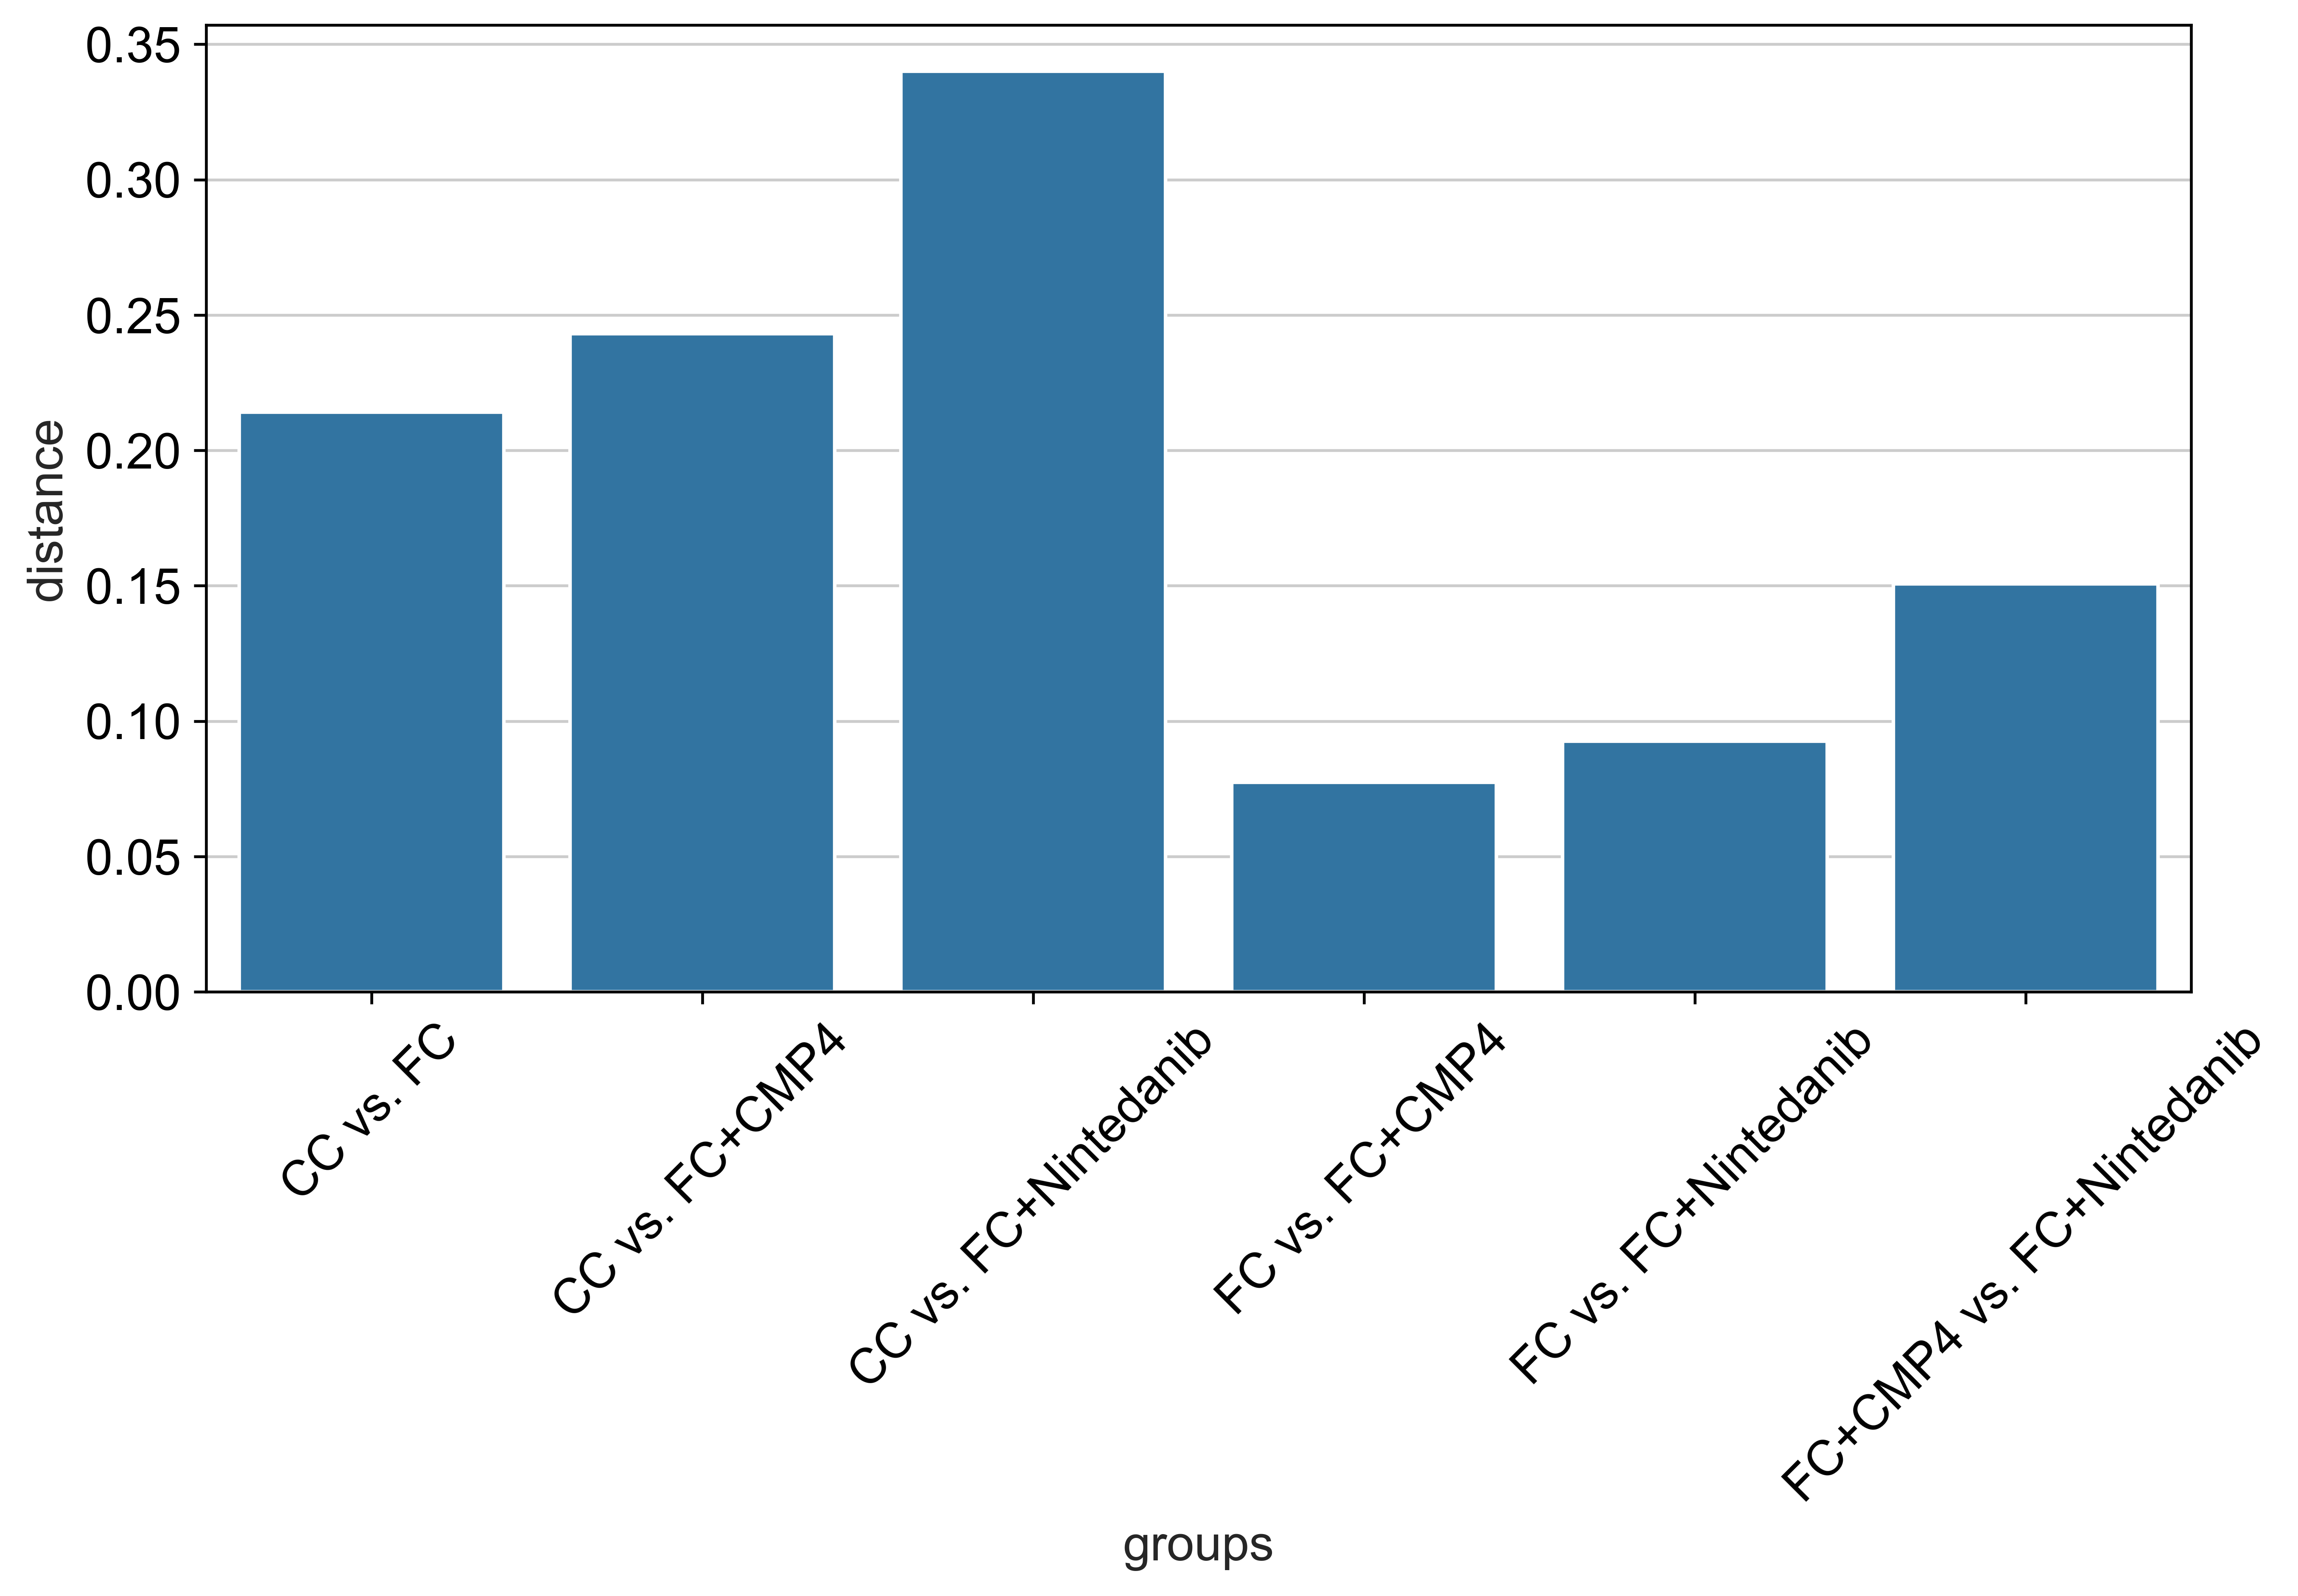

In [16]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=pd.DataFrame(distances), x="groups", y="distance") #, hue="metric"
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

In [ ]:
norm_distances = pd.DataFrame(distances).copy()
# normalize within each metric
#for metric in set(norm_distances["metric"]):
 #   norm_distances.loc[norm_distances["metric"] == metric, "distance"] = (norm_distances.loc[norm_distances["metric"] == metric, "distance"] - min(norm_distances.loc[norm_distances["metric"] == metric, "distance"])) / (max(norm_distances.loc[norm_distances["metric"] == metric, "distance"]) - min(norm_distances.loc[norm_distances["metric"] == metric, "distance"]))
 
norm_distances["distance"] = (norm_distances["distance"] - min(norm_distances["distance"])) / (max(norm_distances["distance"]) - min(norm_distances["distance"]))

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=pd.DataFrame(norm_distances), x="groups", y="distance") #, hue="metric"
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)